<a href="https://colab.research.google.com/github/sn9691/ML-projects/blob/master/telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
plt.rcParams['figure.figsize'] = (10,6)

In [0]:
df = pd.read_csv('telco_churn.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [0]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

In [83]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.581350
std,0.368612,24.559481,30.090047,2264.729447
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,394.000000
50%,0.000000,29.000000,70.350000,1393.600000
75%,0.000000,55.000000,89.850000,3786.100000
max,1.000000,72.000000,118.750000,8550.000000


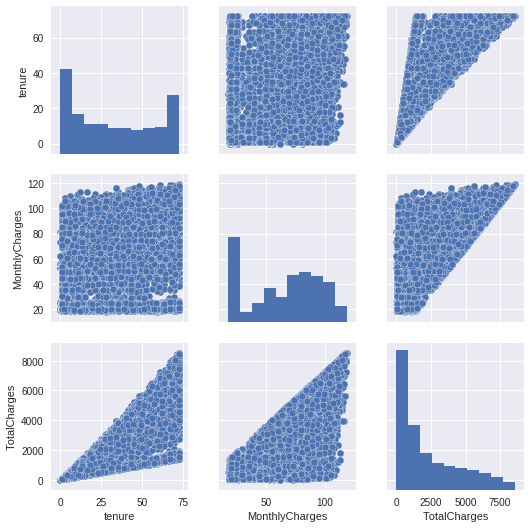

In [84]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

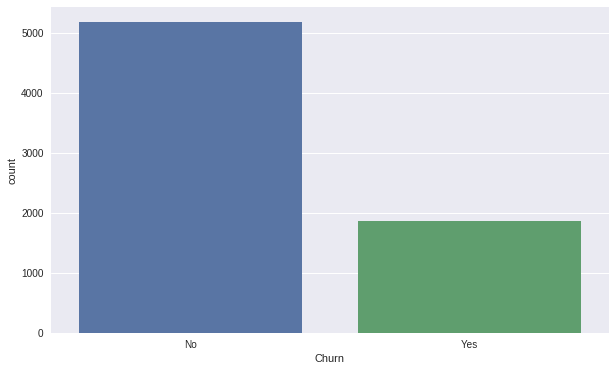

In [85]:
sns.countplot('Churn', data=df)

In [0]:
# Churn values are highly imbalanced

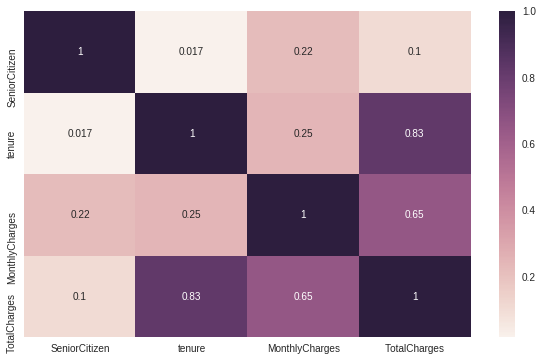

In [87]:
sns.heatmap(df.corr(), annot=True)

In [0]:
# TotalCharges is more correlated to Tenure than MonthlyCharges

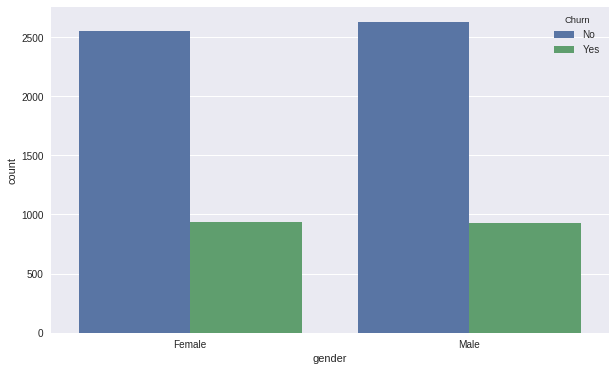

In [89]:
sns.countplot('gender', data=df, hue='Churn')

In [0]:
# gender doesn't seem to affect churn rate

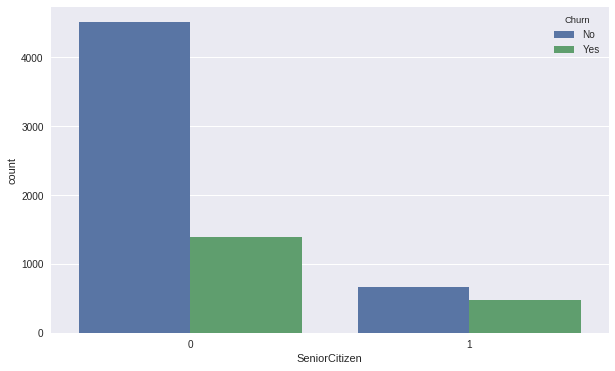

In [91]:
sns.countplot('SeniorCitizen', data=df, hue='Churn')

In [0]:
# data is imbalanced but also seems to be an important featurr affecting churn

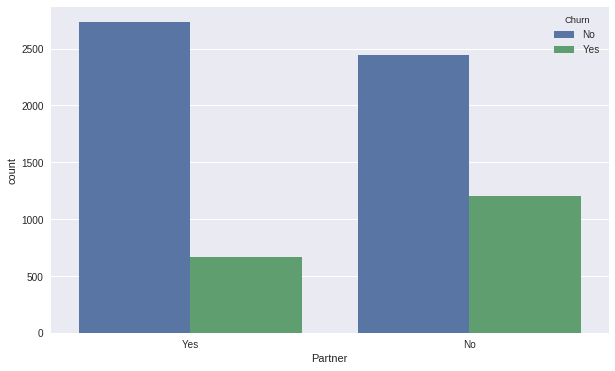

In [93]:
sns.countplot('Partner', data=df, hue='Churn')

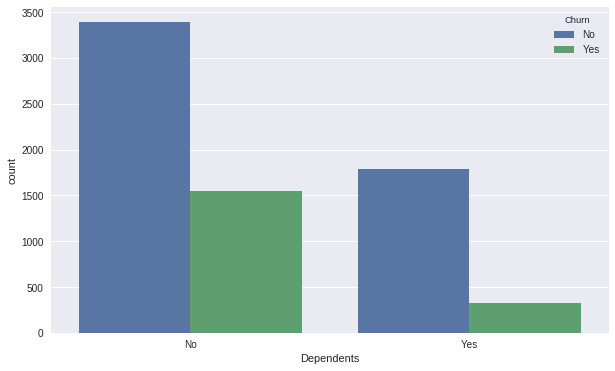

In [94]:
sns.countplot('Dependents', data=df, hue='Churn')

In [0]:
# partner isn't as imbalanced as dependents
# dependents seems to affect churn much more than partner

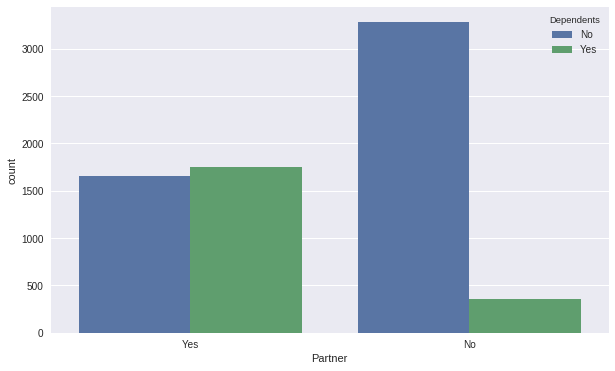

In [96]:
sns.countplot('Partner', data=df, hue='Dependents')

In [0]:
# people who have a partner are equally likely to either have or not have dependents
# people who don't have a partner are far more likely to not have any dependents 

In [0]:
# thus, we can conclude that the partner feature is expendable

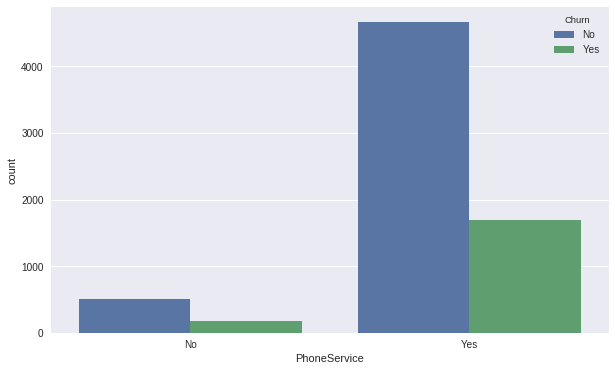

In [99]:
sns.countplot('PhoneService', data=df, hue='Churn')

In [0]:
# people without phone service don't contribute much to churn

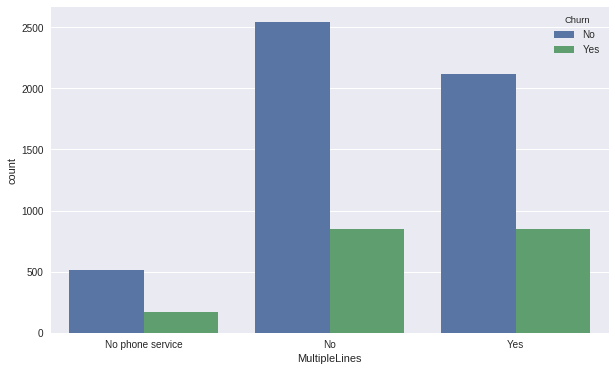

In [101]:
sns.countplot('MultipleLines', data=df, hue='Churn')

In [0]:
# customer churn seems equally like irrespective of people having multiple lines; although churn is less likely to happen if 
# people have multiple lines

In [0]:
# we need only the multiple lines feature here since having a phone service or not gets included in this feature

In [0]:
# the following variables all depend on the internet service feature, i.e. whether the customer ahs access to inter net or not

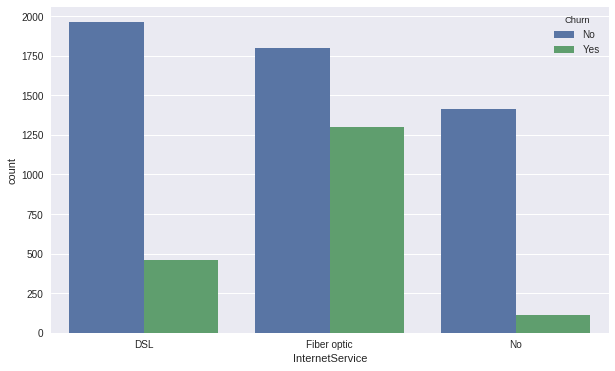

In [105]:
sns.countplot('InternetService', data=df, hue='Churn')

In [0]:
# people who don't have internet are far less likely to churn

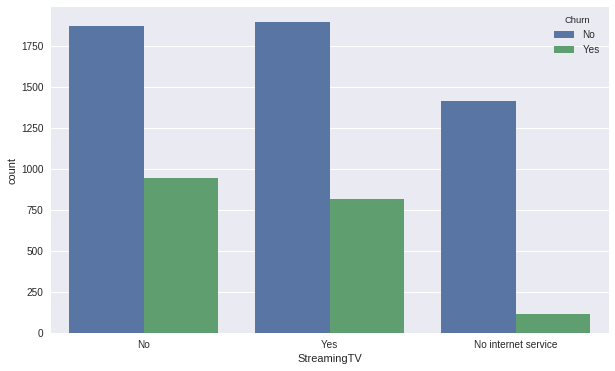

In [107]:
sns.countplot('StreamingTV', data=df, hue='Churn')

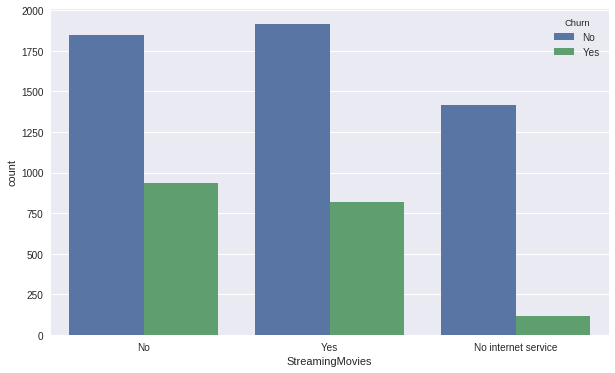

In [108]:
sns.countplot('StreamingMovies', data=df, hue='Churn')

In [0]:
# whether a customer streams movies and tv or not doesn't seem to affect churn rate much, we can 

# Data Preprocessing

In [0]:
df.drop(['customerID', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'Partner'], axis=1, inplace=True)

In [0]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [0]:
X = pd.get_dummies(X)

In [0]:
# removing all no internet sevices columns

In [0]:
X.drop(['OnlineSecurity_No internet service',
       'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
       'TechSupport_No internet service'], axis=1, inplace=True)

In [0]:
y.replace(['Yes', 'No'], [1, 0], inplace=True)

In [0]:
# feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [0]:
cont_vals = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
data = ss.fit_transform(cont_vals)
cont_vals = pd.DataFrame(data=data, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = cont_vals[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [118]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,5.945991e-17,-8.291599e-17,3.978706e-17,0.495244,0.504756,0.700412,0.299588,0.481329,0.096834,...,0.290217,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00,0.500013,0.500013,0.458110,0.458110,0.499687,0.295752,...,0.453895,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,-1.318165e+00,-1.545860e+00,-1.006629e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.326448e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.372744e-01,1.857327e-01,-3.912362e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,9.214551e-01,8.338335e-01,6.652563e-01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.613701e+00,1.794352e+00,2.768924e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# metrics for model evaluation
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# parameter tuning, simple train-test split, stratified k fold train test split 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# smote
from imblearn.over_sampling import SMOTE

In [0]:
# function to plot metrics
def draw_curve(pred_proba, y_test):
    pos_pred = pred_proba[:, 1]
    auc = roc_auc_score(y_test, pos_pred)
    fpr, tpr, threshold = roc_curve(y_test, pos_pred)
    plt.plot(fpr, tpr, 'r', marker='.')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC = {:0.4f}'.format(auc))

In [0]:
# function for modelling
def telco_model(model, X, y):
    
    for train_idx, test_idx in skf.split(X, y):
      print('Train: ',train_idx,'Test: ',test_idx)
      X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
      y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] 
      
      sm = SMOTE(ratio = 1.0)
      X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
      model.fit(X_train_res, y_train_res)
    
    model_pred_proba = model.predict_proba(ss.fit_transform(X_test.values))
    model_pred = model.predict(ss.fit_transform(X_test.values))
    
#     tp = confusion_matrix[0,0]
#     fp = confusion_matrix[0,1]
#     fn = confusion_matrix[1,0]
#     tn = confusion_matrix[1,1]
    
#     accuracy= (tp+fp)/(tp+fp+tn+fn)
    
    draw_curve(model_pred_proba, y_test)
    print('\n', classification_report(y_test, model_pred))
    print(confusion_matrix(y_test, model_pred))
#     print('Accuracy {}'.format(accuracy))

# Logistic Regression

In [0]:
# import model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

Train:  [1408 1409 1411 ... 7040 7041 7042] Test:  [   0    1    2 ... 1406 1407 1410]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [1408 1409 1411 ... 2862 2869 2871]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [2805 2806 2807 ... 4266 4269 4272]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [4207 4208 4209 ... 5644 5646 5651]
Train:  [   0    1    2 ... 5644 5646 5651] Test:  [5625 5626 5627 ... 7040 7041 7042]

               precision    recall  f1-score   support

           0       0.92      0.60      0.72      1034
           1       0.43      0.86      0.58       373

   micro avg       0.67      0.67      0.67      1407
   macro avg       0.68      0.73      0.65      1407
weighted avg       0.79      0.67      0.69      1407

[[617 417]
 [ 52 321]]


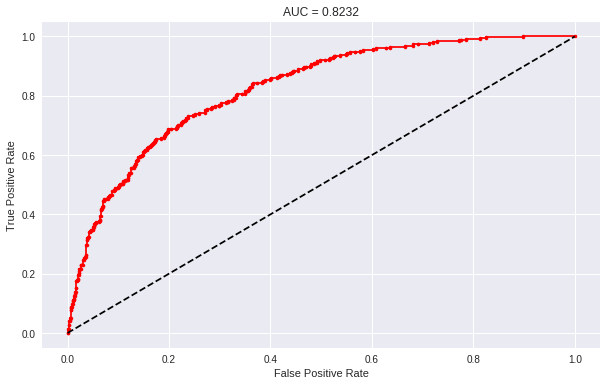

In [123]:
telco_model(log, X, y)

# K Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

K: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

Text(0.5, 1.0, 'K vs Error')

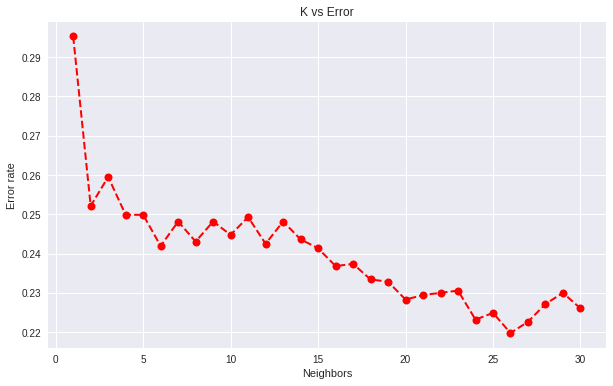

In [125]:
# choosing the right value of K

error = []

print('K:', end=' ')
for k in range(1,31):
  print('{}'.format(k), end=' ')
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  error.append(np.mean(y_test!=pred))
  
plt.plot(range(1,31), error, 'r--', linewidth=2, markersize=8, marker='o')
plt.xlabel('Neighbors')
plt.ylabel('Error rate')
plt.title('K vs Error')

Train:  [1408 1409 1411 ... 7040 7041 7042] Test:  [   0    1    2 ... 1406 1407 1410]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [1408 1409 1411 ... 2862 2869 2871]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [2805 2806 2807 ... 4266 4269 4272]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [4207 4208 4209 ... 5644 5646 5651]
Train:  [   0    1    2 ... 5644 5646 5651] Test:  [5625 5626 5627 ... 7040 7041 7042]

               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1034
           1       0.51      0.74      0.60       373

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407

[[769 265]
 [ 98 275]]


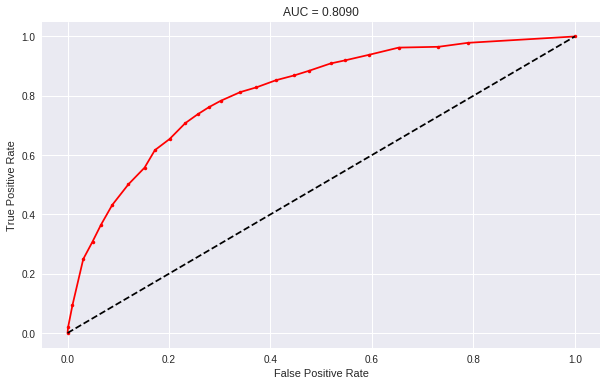

In [126]:
# at k= 26 we get the least error

knn = KNeighborsClassifier(n_neighbors=26)
telco_model(knn, X, y)

# Decision Tree and Random Forest

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# we'll model a decision tree first, then based upon it we'll model the random forest

Train:  [1408 1409 1411 ... 7040 7041 7042] Test:  [   0    1    2 ... 1406 1407 1410]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [1408 1409 1411 ... 2862 2869 2871]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [2805 2806 2807 ... 4266 4269 4272]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [4207 4208 4209 ... 5644 5646 5651]
Train:  [   0    1    2 ... 5644 5646 5651] Test:  [5625 5626 5627 ... 7040 7041 7042]

               precision    recall  f1-score   support

           0       0.84      0.62      0.71      1034
           1       0.39      0.68      0.50       373

   micro avg       0.63      0.63      0.63      1407
   macro avg       0.62      0.65      0.60      1407
weighted avg       0.72      0.63      0.65      1407

[[637 397]
 [119 254]]


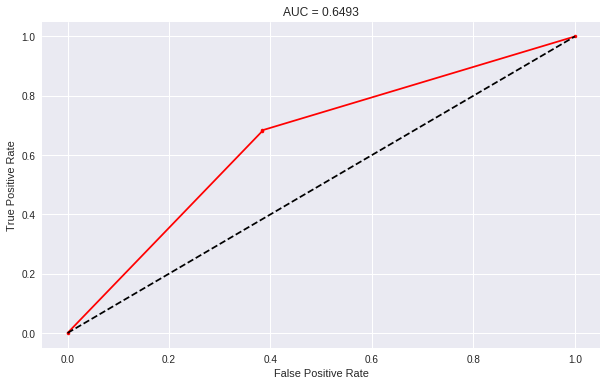

In [129]:
tree = DecisionTreeClassifier()
telco_model(tree, X, y)

In [0]:
parameters = {'max_depth': list(np.linspace(1, 50, 50, endpoint=True)),
             'min_samples_split': list(np.linspace(0.1, 1.0, 10, endpoint=True)),
             'min_samples_leaf': list(np.linspace(0.1, 0.5, 5, endpoint=True)),
             'max_features': list(range(1,X.shape[1])),
             }

In [131]:
rnd = RandomizedSearchCV(tree, parameters, cv=100, n_iter=500, random_state=100)
rnd.fit(X_train, y_train)
rnd.best_params_

{'max_depth': 41.0,
 'max_features': 30,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2}

In [0]:
tree = DecisionTreeClassifier(max_depth=32.0, max_features=30, min_samples_leaf=0.1, min_samples_split=0.1)

Train:  [1408 1409 1411 ... 7040 7041 7042] Test:  [   0    1    2 ... 1406 1407 1410]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [1408 1409 1411 ... 2862 2869 2871]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [2805 2806 2807 ... 4266 4269 4272]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [4207 4208 4209 ... 5644 5646 5651]
Train:  [   0    1    2 ... 5644 5646 5651] Test:  [5625 5626 5627 ... 7040 7041 7042]

               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1034
           1       0.51      0.71      0.59       373

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407

[[779 255]
 [110 263]]


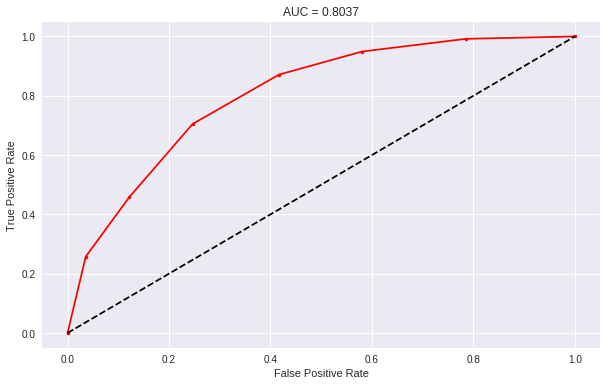

In [133]:
telco_model(tree, X, y)

In [0]:
forest = RandomForestClassifier(max_depth=32.0, max_features=30, min_samples_leaf=0.1, min_samples_split=0.1)

Train:  [1408 1409 1411 ... 7040 7041 7042] Test:  [   0    1    2 ... 1406 1407 1410]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [1408 1409 1411 ... 2862 2869 2871]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [2805 2806 2807 ... 4266 4269 4272]
Train:  [   0    1    2 ... 7040 7041 7042] Test:  [4207 4208 4209 ... 5644 5646 5651]
Train:  [   0    1    2 ... 5644 5646 5651] Test:  [5625 5626 5627 ... 7040 7041 7042]

               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1034
           1       0.51      0.71      0.59       373

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407

[[779 255]
 [110 263]]


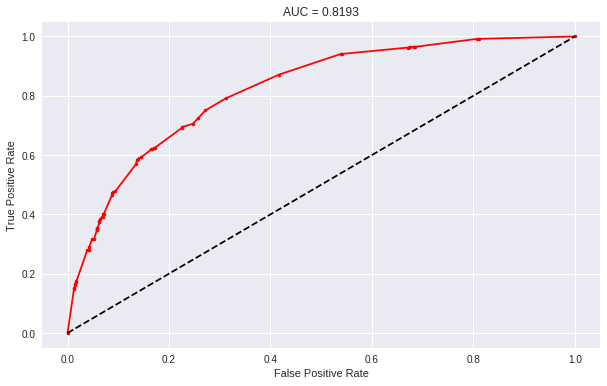

In [135]:
telco_model(forest, X, y)